In [27]:
import pandas as pd
import string
import joblib
import matplotlib.pyplot as plt
from collections import Counter

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Kita ada 2 dataset.
1. dataset Terraria -> dataset yang kita jadiin target. buat ngecek ini game worthy buat sequel atau ngganya dari sini
2. dataset reviewmodel -> dataset buat ngebuat modelnya.

cara kerja :
1. buat model
2. baca dataset terraria
3. suruh modelnya buat conclusion terhadap data di terraria (bisa plotting, bisa data berbasis text dll)

# MODEL TRAINING

di bagian (df_model = pd.read_csv('dataset/reviewmodel.csv')), 

ini kalo kalian contohnya taro di folder lain bisa ganti jadi df_model = pd.read_csv('nama-folder/reviewmodel.csv') 

atau bisa langsung (df_model = pd.read_csv('reviewmodel.csv')) kalo ga ditaro di folder mana mana

In [28]:
# Load dataset buat model
df = pd.read_csv('dataset/reviewmodel.csv')
df_model = df.sample(n=80000, random_state=42)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 898501 to 1448211
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  79947 non-null  object
 1   overall     80000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [29]:
# prep (tokenize, stopwords, punctuations)
def remove(text):
    english_stopwords = set(stopwords.words('english'))
    punctuation_list = set(string.punctuation)
    tokens = word_tokenize(text.lower())  # Tokenization and lowercasing
    tokens = [word for word in tokens if word not in english_stopwords and word not in punctuation_list]  # Remove stopwords, punctuation, and non-alphabetic words
    return ' '.join(tokens)

def preprocess_text():
    df_model.dropna(subset=['reviewText'], inplace=True)
    target = df_model['reviewText'].apply(remove)
    return target

In [30]:
def model_training():
    target = preprocess_text()  # prep reviewText
    label = df_model['overall'].apply(lambda x: 1 if x > 3 else 0)  # rating 1-3 ubah jadi 0 (ga rekomen) rating 4-5 jadi 1 (rekomen)

    # split data
    X_train, X_test, y_train, y_test = train_test_split(target, label, test_size=0.3, random_state=42)

    # TFIDF + Naive Bayes
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
    model = make_pipeline(vectorizer, RandomForestClassifier())
    model.fit(X_train, y_train)

    # cek akurasi
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusionMatrix = confusion_matrix(y_test, y_pred)
    classificationReport = classification_report(y_test, y_pred)
    with open("RF METRICS.txt", "w", encoding="utf-8") as f:
        f.write(f'Accuracy:\n{accuracy * 100:.2f}%\n\n')
        f.write(f'Confusion Matrix:\n{confusionMatrix}\n\n')
        f.write(f'Classification Report:\n{classificationReport}\n')

    # display 5 contoh
    for review, true_label, pred_label in zip(X_test[:5], y_test[:5], y_pred[:5]):  
        print(f"Review: {review}\nTrue Sentiment: {true_label}\tPredicted Sentiment: {pred_label}")
        print("-" * 50)

    # save model
    with open("RF.pkl", "wb") as f:
        joblib.dump(model, f)

    # plotting
    counts = [(pred_label == 0).sum(), (pred_label == 1).sum()]
    labels = ["Negative (0)", "Positive (1)"]
    colors = ["cyan", "lightcoral"]

    plt.pie(counts, labels=labels, autopct='%.1f%%', colors=colors, startangle=90)
    plt.title("Target Sentiment Distribution\n")
    plt.axis('equal') 
    plt.show()

    return model

biar gaperlu nge load modelnya lama lama lagi kalo udah punya

loading model...
training model...
Review: green naga couple years headset game pad razer also chroma 's figured devices change colors together looks cool also naga great functions green naga defiantly worth price
True Sentiment: 1	Predicted Sentiment: 1
--------------------------------------------------
Review: exactly needed 'm glad chosen right mouse makes gaming much better easier great condition packaging secure
True Sentiment: 1	Predicted Sentiment: 1
--------------------------------------------------
Review: really enjoyed game lot stellar mix action amazing movie tied voice acting top notch graphics pacing excellent additionally level design worked well game levels flat awesome additionally loved new ip created knight round table steampunk late 1800 's setting really nothing bad say game much like ryse game panned unfairly opinion n't think would stoked pay 60 game purchased 20 felt like got well money 's worth hope continue series designed first probably trilogy continue ip
Tr

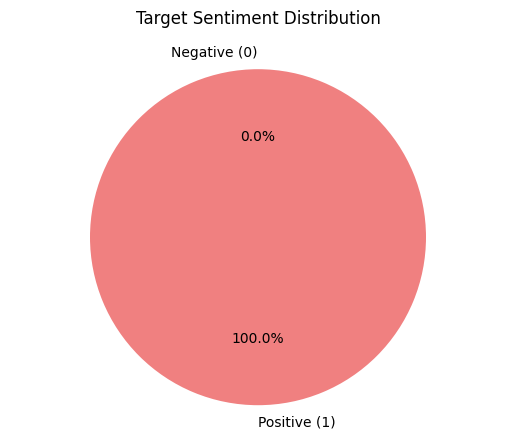

model trained


In [31]:
try:
    # coba load model kalo udah ada biar gaperlu run data training lama lama
    print("loading model...")
    with open("RF.pkl", "rb") as f:
        classifier = joblib.load(f)
    print("model loaded")
except:
    # kalo belom ada modelnya, training model dulu
    print("training model...")
    classifier = model_training()
    print("model trained")